# Unit 3.4 Exercise

### Laura Gutierrez Funderburk

## Table of Contents

1. Instructions

2. Solution

## Instructions 

For the solution, move to the next section. 

This exercise will require you to pull some data from https://data.nasdaq.com/ (formerly Quandl API).

As a first step, you will need to register a free account on the https://data.nasdaq.com/ website.

After you register, you will be provided with a unique API key, that you should store:

*Note*: Use a `.env` file and put your key in there and `python-dotenv` to access it in this notebook. 

The code below uses a key that was used when generating this project but has since been deleted. Never submit your keys to source control. There is a `.env-example` file in this repository to illusrtate what you need. Copy that to a file called `.env` and use your own api key in that `.env` file. Make sure you also have a `.gitignore` file with a line for `.env` added to it. 

The standard Python gitignore is [here](https://github.com/github/gitignore/blob/master/Python.gitignore) you can just copy that. 

Nasdaq Data has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Nasdaq Data API instructions here: https://docs.data.nasdaq.com/docs/in-depth-usage

While there is a dedicated Python package for connecting to the Nasdaq API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

Note: API's can change a bit with each version, for this exercise it is reccomended to use the nasdaq api at `https://data.nasdaq.com/api/v3/`. This is the same api as what used to be quandl so `https://www.quandl.com/api/v3/` should work too.

Hint: We are looking for the `AFX_X` data on the `datasets/FSE/` dataset.

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

## Solution

In [125]:
# First, import the relevant modules
import json
import requests as r
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv  
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Get API key
load_dotenv()
API_KEY = os.getenv('NASDAQ_API_KEY')

# 1 Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
try:
    nasdaq_url = f"https://data.nasdaq.com/api/v3/datasets/FSE/AFX_X/data.json?start_date=2017-01-01&end_date=2017-12-31&api_key={API_KEY}"
    nasdaq_data_get = r.get(nasdaq_url)
    print("Success! Obtained desired data")
except r.exceptions.Timeout:
    
    print("Time out, try again")
except r.exceptions.TooManyRedirects:
    
    print("Bad URL, please try a different URL that is valid")
except r.exceptions.RequestException as e:
    
    raise SystemExit(e)

# 2 Convert the returned JSON object into a Python dictionary.
nasdaq_data = nasdaq_data_get.json()

# Sanity check to ensure data structure is of type dict
print(type(nasdaq_data))

Success! Obtained desired data
<class 'dict'>


In [31]:
# 3 Calculate what the highest and lowest opening prices were for the stock in this period.

# Flatten json object into pandas dataframe
nasdaq_df = pd.json_normalize(nasdaq_data, record_path=["dataset_data",'data'])

# Do column renaming
new_column_names = nasdaq_data['dataset_data']['column_names'] 
old_column_names = list(nasdaq_df.columns)
column_dict = {old_column_names[i]: new_column_names[i] for i in range(len(old_column_names)) }
nasdaq_df.rename(columns=column_dict, inplace=True)

# Sort by date
nasdaq_df.sort_values(by="Date", inplace=True)

# display(nasdaq_df.head(5))

# Max & min opening prices
max_price = nasdaq_df["Open"].max()
min_price = nasdaq_df["Open"].min()

print(f"The highest opening price was {max_price}, whereas the lowest opening price was {min_price}")

The highest opening price was 53.11, whereas the lowest opening price was 34.0


In [32]:
# 4 What was the largest change in any one day (based on High and Low price)?
largest_change = pd.Series(nasdaq_df['High'] - nasdaq_df['Low']).max()

print(f"The largest change in any one day (based on High and Low price) was {largest_change.round(2)}")

The largest change in any one day (based on High and Low price) was 2.81


In [36]:
# 5 What was the largest change between any two days (based on Closing Price)?
max_close_change_two_days = nasdaq_df['Close'].diff().max()

print(f"The largest change in any two day (based on Closing price) was {max_close_change_two_days.round(2)}")

The largest change in any two day (based on Closing price) was 1.72


In [40]:
# 6 What was the average daily trading volume during this year?
average_traded = nasdaq_df['Traded Volume'].mean().round(2)

print(f"The average daily trading volume during this year was {average_traded.round(2)}")

The average daily trading volume during this year was 89124.34


In [43]:
# 7 (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

median_traded = nasdaq_df['Traded Volume'].median().round(2)

print(f"The median trading volume during this year was {median_traded.round(2)}")


The median trading volume during this year was 76286.0


## Exploring the data

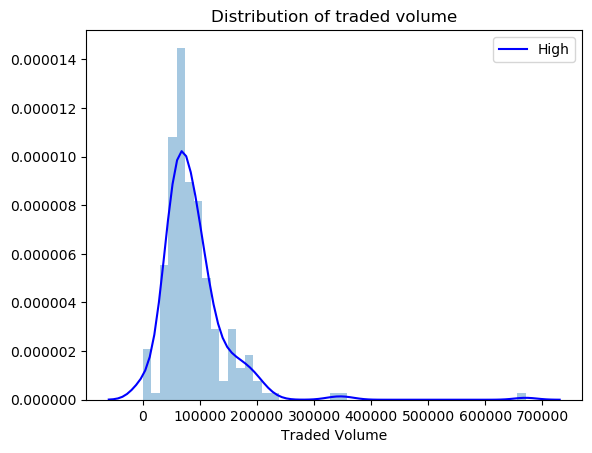

In [99]:
sns.distplot(nasdaq_df["Traded Volume"], hist=True,
            rug_kws={"color": "b"},  
            kde_kws={"color": "b",  "label": "High"})

plt.title("Distribution of traded volume")
plt.show()

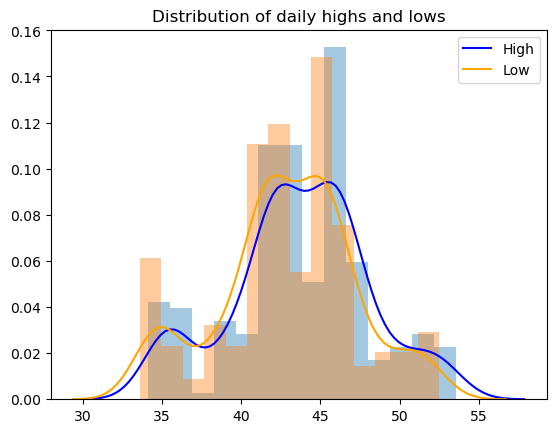

In [100]:
sns.distplot(nasdaq_df["High"], hist=True, rug_kws={"color": "b"},
                   kde_kws={"color": "b",  "label": "High"},axlabel =False)
sns.distplot(nasdaq_df["Low"], hist=True, rug_kws={"color": "orange"},
                   kde_kws={"color": "orange",  "label": "Low"},axlabel =False)
plt.title("Distribution of daily highs and lows")
plt.show()


In [113]:
month_dict = {
                1: "January",
                2: "February",
                3: "March",
                4: "April",
                5: "May",
                6: "June",
                7: "July",
                8: "August",
                9: "September",
                10: "October",
                11: "November",
                12: "December"
            }

nasdaq_df['Month'] = pd.to_datetime(nasdaq_df['Date']).dt.month

nasdaq_df['Month'] = nasdaq_df['Month'].map(month_dict)

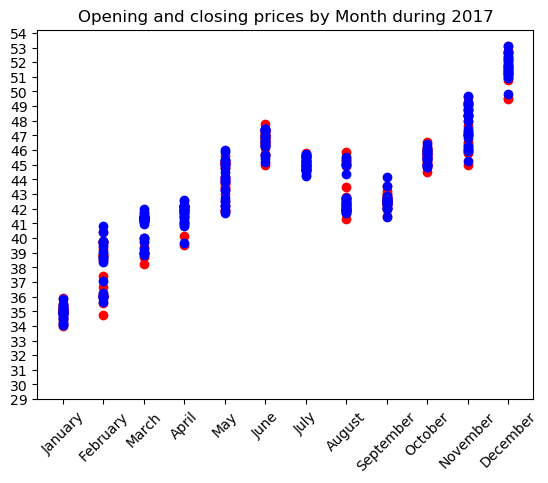

In [136]:
plt.scatter(x = nasdaq_df["Month"], y = nasdaq_df["Open"], color='r')
plt.scatter(x = nasdaq_df["Month"], y = nasdaq_df["Close"], color='b')
plt.xticks(rotation = 45)
plt.yticks(np.arange(nasdaq_df["Open"].min()-5, nasdaq_df["Open"].max()+1))
plt.title("Opening and closing prices by Month during 2017")
plt.show()